In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import random
import os
import json
from pathlib import Path
from torch.utils.data import Dataset

In [4]:
class myDataset(Dataset):
    def __init__(self, data_dir, segment_len=128):
        self.data_dir = data_dir
        self.segment_len = segment_len

        mapping_path = Path(data_dir) / "mapping.json"
        mapping = json.load(mapping_path.open())
        self.speaker2id = mapping["speaker2id"]

        metadata_path = Path(data_dir) / "metadata.json"
        metadata = json.load(open(metadata_path))["speakers"]

        self.speaker_num = len(metadata.keys())
        self.data = []
        for speaker in metadata:
            for utterance in metadata[speaker]:
                self.data.append([utterance["feature_path"], self.speaker2id[speaker]])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        feat_path, speaker = self.data[index]
        mel = torch.load(os.path.join(self.data_dir, feat_path))
        if len(mel) > self.segment_len:
            start = random.randint(0, len(mel) - self.segment_len)
            mel = torch.FloatTensor(mel[start:start+self.segment_len])
        else:
            mel = torch.FloatTensor(mel)
        speaker = torch.FloatTensor([speaker]).long()
        return mel, speaker

    def get_speaker_number(self):
        return self.speaker_num

In [5]:
train_set = myDataset("./../../Data/HW4/Dataset")

In [6]:
len(train_set)

69438

In [7]:
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)

In [8]:
print(f"Total speakers: {train_set.get_speaker_number()}")

Total speakers: 600


In [9]:
from collections import Counter

speaker_coounts = Counter()
for _, label in train_set:
    speaker_coounts[int(label)] += 1

sorted_counts = sorted(speaker_coounts.items())
speaker_ids = [item[0] for item in sorted_counts]
counts = [item[1] for item in sorted_counts]

C:\Users\ChenYL\AppData\Local\Temp\ipykernel_21380\1007650348.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mel = torch.load(os.path.join(self.data_dir, feat_path))


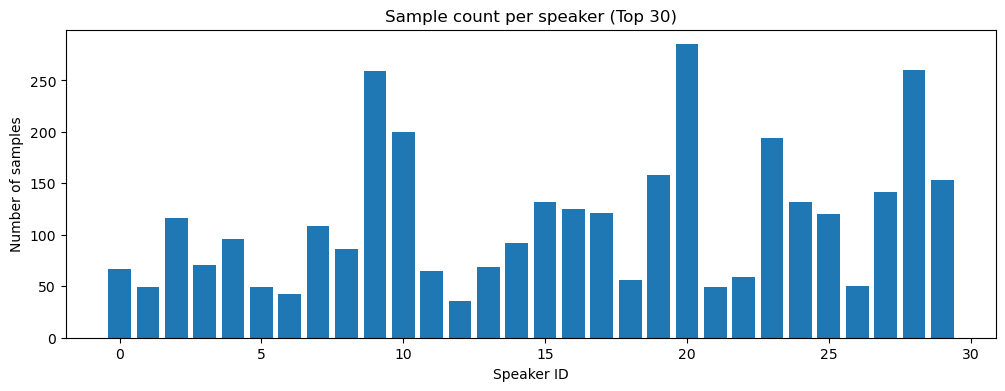

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.bar(speaker_ids[:30], counts[:30])
plt.xlabel("Speaker ID")
plt.ylabel("Number of samples")
plt.title("Sample count per speaker (Top 30)")
plt.show()

In [11]:
mel, label = train_set[0]
print("Mel shape:", mel.shape)
print("Speaker ID", label.item())

Mel shape: torch.Size([128, 40])
Speaker ID 217


C:\Users\ChenYL\AppData\Local\Temp\ipykernel_21380\1007650348.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mel = torch.load(os.path.join(self.data_dir, feat_path))


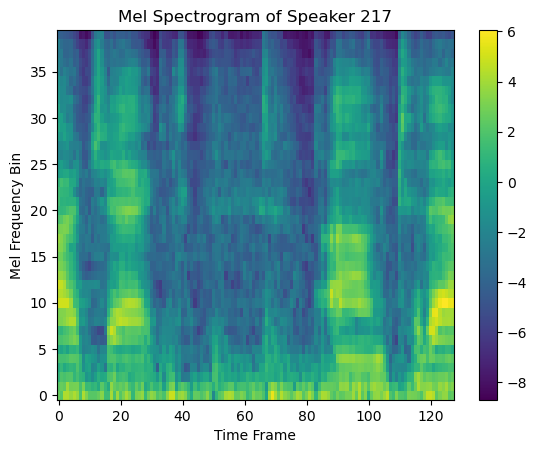

In [12]:
plt.imshow(mel.T, aspect='auto', origin='lower')
plt.title(f"Mel Spectrogram of Speaker {label.item()}")
plt.xlabel("Time Frame")
plt.ylabel("Mel Frequency Bin")
plt.colorbar()
plt.show()

In [13]:
mel_lengths = []
for i in range(100):
    mel, _ = train_set[i]
    mel_lengths.append(len(mel))

C:\Users\ChenYL\AppData\Local\Temp\ipykernel_21380\1007650348.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mel = torch.load(os.path.join(self.data_dir, feat_path))


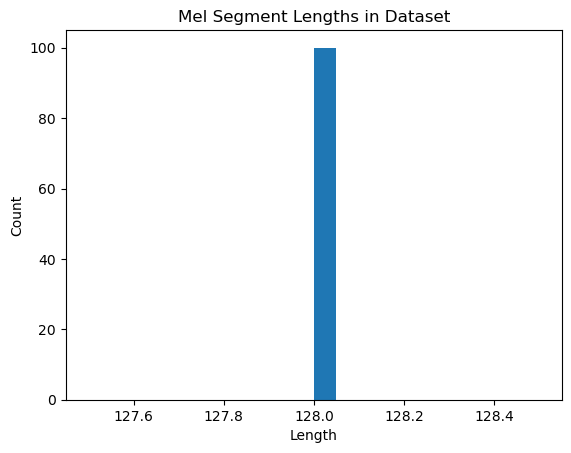

In [14]:
plt.hist(mel_lengths, bins=20)
plt.title("Mel Segment Lengths in Dataset")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

Sample 0, Speaker ID: 217, Mel shape: torch.Size([128, 40])


C:\Users\ChenYL\AppData\Local\Temp\ipykernel_21380\1007650348.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mel = torch.load(os.path.join(self.data_dir, feat_path))


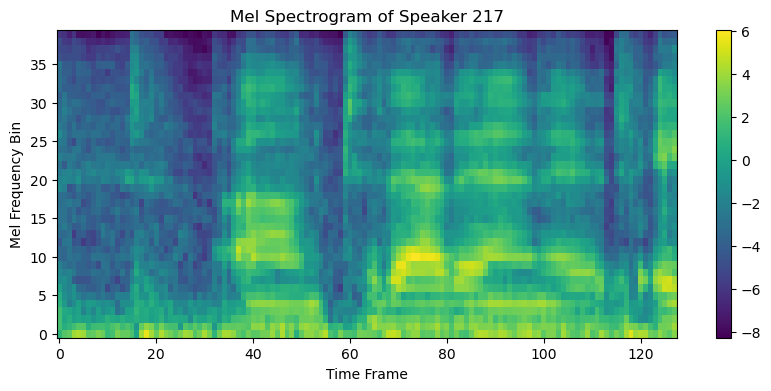

Sample 1, Speaker ID: 217, Mel shape: torch.Size([128, 40])


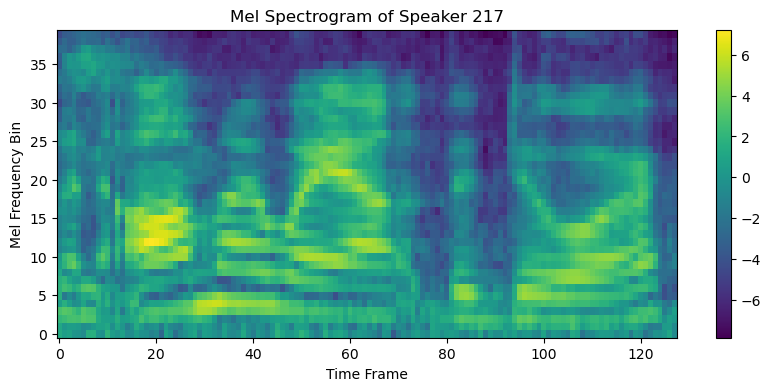

Sample 2, Speaker ID: 217, Mel shape: torch.Size([128, 40])


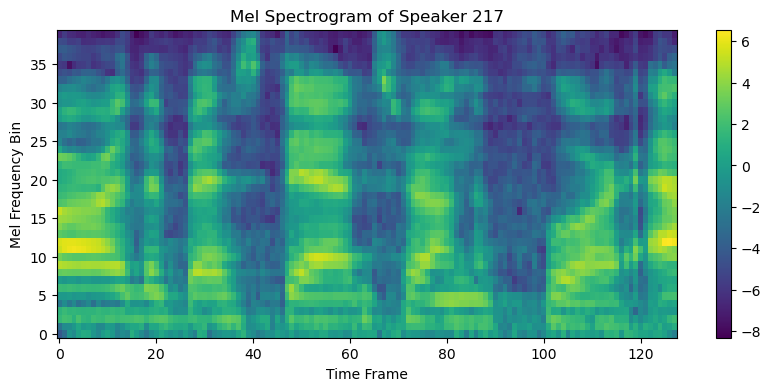

In [15]:
for i in range(3):
    mel, label = train_set[i]
    print(f"Sample {i}, Speaker ID: {label.item()}, Mel shape: {mel.shape}")
    plt.figure(figsize=(10, 4))
    plt.imshow(mel.T, aspect='auto', origin='lower')
    plt.title(f"Mel Spectrogram of Speaker {label.item()}")
    plt.xlabel("Time Frame")
    plt.ylabel("Mel Frequency Bin")
    plt.colorbar()
    plt.show()

In [20]:
class Classifier(nn.Module):
    def __init__(self, d_model=256, nhead=2, num_layers=2, num_classes=600):
        super().__init__()
        self.input_proj = nn.Linear(40, d_model)  # 输入40维 Mel → d_model
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.pooling = nn.AdaptiveAvgPool1d(1)  # 时间维度平均池化
        self.classifier = nn.Linear(d_model, num_classes)

    def forward(self, x):
        # x shape: [B, T, 40]
        x = self.input_proj(x)            # [B, T, d_model]
        x = x.permute(1, 0, 2)            # [T, B, d_model] for transformer
        x = self.encoder(x)               # [T, B, d_model]
        x = x.permute(1, 2, 0)            # [B, d_model, T]
        x = self.pooling(x).squeeze(-1)   # [B, d_model]
        out = self.classifier(x)          # [B, num_classes]
        return out


In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [22]:
device

'cuda'

In [24]:
model = Classifier(num_classes=train_set.get_speaker_number()).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

d:\anaconda3\envs\pytorch_gpu\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [25]:
for epoch in range(1):
    model.train()
    for mel, label in train_loader:
        mel, label = mel.to(device), label.squeeze(1).to(device)
        out = model(mel)
        loss = criterion(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch} Loss: {loss.item():.4f}")

C:\Users\ChenYL\AppData\Local\Temp\ipykernel_21380\1007650348.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mel = torch.load(os.path.join(self.data_dir, feat_path))


RuntimeError: stack expects each tensor to be equal size, but got [128, 40] at entry 0 and [96, 40] at entry 9